#### Anexo E

# Análisis de resultados de la Segmentación Automática

#### Elaborado por: Ricardo Niño de Rivera Barrón

#### Ingeniería Biónica

#### Trabajo Terminal II

En esta libreta interactiva en Python 3.8 se reporta el éxito del segmentador propuesto

In [4]:
#Importando bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

### Ejemplos de Segmentación Correcta

![Imagen correcta 1](BaseDeDatosFrontales_SEGMENTADOR\train\images\T0222.1.1.D.2017-11-18.08_D.png)

![Imagen correcta 2](BaseDeDatosFrontales_SEGMENTADOR\train\images\T0006.1.1.D.2016-10-17.18_I.png)

![Imagen correcta 3](BaseDeDatosFrontales_SEGMENTADOR\train\images\T0034.1.1.D.2016-11-29.10_D.png)

![Imagen correcta 4](BaseDeDatosFrontales_SEGMENTADOR\train\images\T0049.1.1.D.2016-11-07.10_I.png)

### Ejemplos de Segmentación Incorrecta

![Imagen incorrecta 1](BaseDeDatosFrontales_SEGMENTADOR\train\images\T0246.1.1.D.2018-08-22.04_I.png)

![Imagen incorrecta 2](BaseDeDatosFrontales_SEGMENTADOR\train\images\T0246.1.1.D.2018-08-22.08_I.png)

![Imagen incorrecta 3](BaseDeDatosFrontales_SEGMENTADOR\train\images\T0271.1.1.D.2019-01-27.00_D.png)

![Imagen incorrecta 4](BaseDeDatosFrontales_SEGMENTADOR\train\images\T0272.1.1.D.2019-03-13.01_D.png)

## Imágenes de Entrenamiento

Se analizan los resultados de la segmentación en imágenes de entrenamiento:

1: Segmentación Correcta

0: Segmentación Incorrecta

In [158]:
#Leemos el csv con las calificaciones de las imágenes
df_train=pd.read_csv("train_df_images.csv")
df_train.head()

,Images,Output
0,T0001.1.1.D.2016-10-08.00_D.png,1
1,T0001.1.1.D.2016-10-08.00_I.png,0
2,T0001.1.1.D.2016-10-08.01_D.png,0
3,T0001.1.1.D.2016-10-08.01_I.png,0
4,T0001.1.1.D.2016-10-08.02_D.png,0


In [163]:
#Segmentaciones correctas
df_train.Output.value_counts()

0    4601
1    2057
Name: Output, dtype: int64

In [165]:
df_train.loc[df_train["Output"]==1].Output.count()

2057

Del Anexo D sabemos que las imágenes no segmentadas por el algoritmo propuesto fueron 8
Por tanto 16 mamas no se segmentaron correctamente por errores propios del algoritmo propuesto.

In [220]:
#Obteniendo la proporción de éxtitos de mamas segmentadas en el conjunto de entrenamiento
train_corrects=(df_train.loc[df_train["Output"]==1].Output.count()/(df_train.Output.count()+16))*100
train_incorrects=(df_train.loc[df_train["Output"]==0].Output.count()/(df_train.Output.count()+16))*100
print("Proporción de mamas segmentadas correctamente %.2f%%" % train_corrects)
print("Proporción de mamas segmentadas incorrectamente %.2f%%" % train_incorrects)

Proporción de mamas segmentadas correctamente 30.82%
Proporción de mamas segmentadas incorrectamente 68.94%


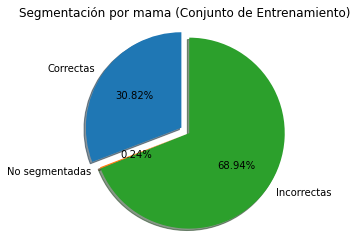

In [191]:
# Ahora mostramos una gráfica de "pastel" de esto información
labels = 'Correctas', 'No segmentadas', 'Incorrectas'
sizes = [train_corrects, (16/(df_train.Output.count()+16))*100, train_incorrects]
explode = (0.1, 0, 0)  # Para resaltar la sección de segementaciones correctas en el gráfico

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%0.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Esta declaración asegura que se dibuje un círculo

ax1.title.set_text('Segmentación por mama (Conjunto de Entrenamiento)')

plt.show()

El algoriitmo propuesto para la segmentación automática bajo el supuesto de una forma parbólica de la mama consigue segmentar el 30.82% de las mamas. 

Pero las mamas individuales no son suficientes para la aplicación propuesta en este trabajo. Debido a que se desconoce cuál mama es positiva (con cáncer) y cual mama es negativa no es posible utilizar las mamas individualmente, además que algunas de las propuestas de solución en este trabajo para la detección de carcinoma utiliza la asimetría térmica de ambos lados del cuerpo (idealmente las glándulas mamarias). Por tanto se evealuará la eficacia de ete algoritmo usando pares de mamas por imagen.

In [201]:
# analizando los pares exitosos
# Como las imágenes aparecen ordenadas en orden de aparición en la tabla del csv primero derecha segundo izquierda
# se realiza el siguiente ciclo while

# Primero obtenemos los valores de la columna Output
out_train=df_train.Output.to_numpy()

# Ciclo while para encontrar los pares exitosos

i=0
exitos=0

while i < out_train.shape[0]-1:
    if i%2==0:
        if out_train[i]==1 and out_train[i+1]==1:
            exitos+=1
    i+=1

In [212]:
exitos_percentage = exitos/(out_train.shape[0]/2+8)*100
mal_percentage = (out_train.shape[0]/2-exitos)/(out_train.shape[0]/2+8)*100
no_segmnt_percentage = 8/(out_train.shape[0]/2+8)*100

In [213]:
print('Total de pares de mamas segementadas correctamente en el conjunto de entrenamiento: '+str(exitos))
print('Porcentaje de pares de mamas segmentadas correctamente en el cojunto de entrenaiento: %0.2f%%'%exitos_percentage)

Total de pares de mamas segementadas correctamente en el conjunto de entrenamiento: 765
Porcentaje de pares de mamas segmentaadas correctamente en el cojunto de entrenaiento: 22.92%


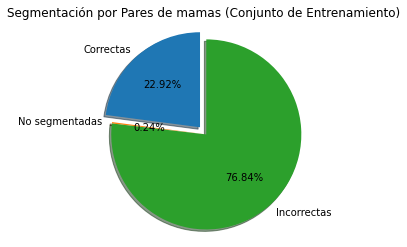

In [214]:
# Ahora mostramos una gráfica de "pastel" de esto información
labels = 'Correctas', 'No segmentadas', 'Incorrectas'
sizes = [exitos_percentage, no_segmnt_percentage, mal_percentage]
explode = (0.1, 0, 0)  # Para resaltar la sección de segementaciones correctas en el gráfico

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%0.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Esta declaración asegura que se dibuje un círculo

ax1.title.set_text('Segmentación por Pares de mamas (Conjunto de Entrenamiento)')

plt.show()

## Imágenes de Validación

Ahora realizamos el mismo análisis para las imágenes de validación.

In [216]:
#Leemos el csv con las calificaciones de las imágenes
df_test=pd.read_csv("test_df_images.csv")
df_test.head()

,Images,Output
0,T0012.1.1.D.2016-10-26.00_D.png,0
1,T0012.1.1.D.2016-10-26.00_I.png,0
2,T0012.1.1.D.2016-10-26.01_D.png,0
3,T0012.1.1.D.2016-10-26.01_I.png,0
4,T0012.1.1.D.2016-10-26.02_D.png,0


Para las imágenes de validación todas fueron segmentadas (no hubo errores provenientes del algoritmo segmentador).
Esto se reporta en el Anexo D.

In [219]:
#Obteniendo la proporción de éxtitos de mamas segmentadas en el conjunto de validación
test_corrects=df_test.loc[df_test["Output"]==1].Output.count()/df_test.Output.count()*100
test_incorrects=df_test.loc[df_test["Output"]==0].Output.count()/df_test.Output.count()*100
print("Proporción de mamas segmentadas correctamente %.2f%%" % test_corrects)
print("Proporción de mamas segmentadas incorrectamente %.2f%%" % test_incorrects)

Proporción de mamas segmentadas correctamente 21.27%
Proporción de mamas segmentadas incorrectamente 78.67%


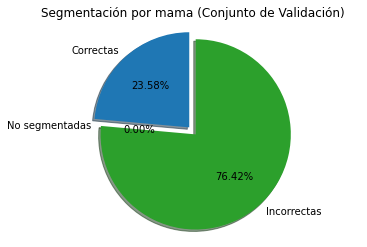

In [222]:
# Ahora mostramos una gráfica de "pastel" de esto información
labels = 'Correctas', 'No segmentadas', 'Incorrectas'
sizes = [test_corrects, 0, train_incorrects]
explode = (0.1, 0, 0)  # Para resaltar la sección de segementaciones correctas en el gráfico

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%0.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Esta declaración asegura que se dibuje un círculo

ax1.title.set_text('Segmentación por mama (Conjunto de Validación)')

plt.show()

In [223]:
# analizando los pares exitosos
# Como las imágenes aparecen ordenadas en orden de aparición en la tabla del csv primero derecha segundo izquierda
# se realiza el siguiente ciclo while

# Primero obtenemos los valores de la columna Output
out_test=df_test.Output.to_numpy()

# Ciclo while para encontrar los pares exitosos

i=0
exitos2=0

while i < out_test.shape[0]-1:
    if i%2==0:
        if out_test[i]==1 and out_test[i+1]==1:
            exitos2+=1
    i+=1

In [227]:
exitos2_percentage = exitos2/(out_test.shape[0]/2)*100
mal2_percentage = (out_test.shape[0]/2-exitos2)/(out_test.shape[0]/2)*100
no2_segmnt_percentage = 0

In [228]:
print('Total de pares de mamas segementadas correctamente en el conjunto de validación: '+str(exitos2))
print('Porcentaje de pares de mamas segmentadas correctamente en el cojunto de validación: %0.2f%%'%exitos2_percentage)

Total de pares de mamas segementadas correctamente en el conjunto de validación: 119
Porcentaje de pares de mamas segmentadas correctamente en el cojunto de validación: 14.30%


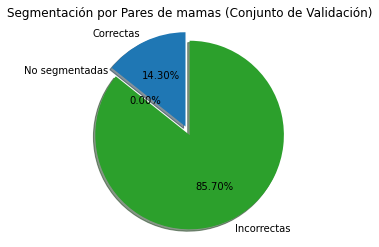

In [229]:
# Ahora mostramos una gráfica de "pastel" de esto información
labels = 'Correctas', 'No segmentadas', 'Incorrectas'
sizes = [exitos2_percentage, no2_segmnt_percentage, mal2_percentage]
explode = (0.1, 0, 0)  # Para resaltar la sección de segmentaciones correctas en el gráfico

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%0.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Esta declaración asegura que se dibuje un círculo

ax1.title.set_text('Segmentación por Pares de mamas (Conjunto de Validación)')

plt.show()

## Imágenes considerando AMBOS CONJUNTOS

Ahora desplegaremos los resultados considerando ambos conjuntos.

In [231]:
#Obteniendo la proporción de éxtitos de mamas segmentadas
total_corrects_num=df_train.loc[df_train["Output"]==1].Output.count()+df_test.loc[df_test["Output"]==1].Output.count()
total_incorrects_num=df_train.loc[df_train["Output"]==0].Output.count()+df_test.loc[df_test["Output"]==0].Output.count()
total_no_segmnt_num=16
total_corrects=total_corrects_num/(df_train.Output.count()+df_test.Output.count()+16)*100
total_incorrects=total_incorrects_num/(df_train.Output.count()+df_test.Output.count()+16)*100
total_no_segmnt=16/(df_train.Output.count()+df_test.Output.count()+16)*100
print("Proporción de mamas segmentadas correctamente %.2f%%" % total_corrects)
print("Proporción de mamas segmentadas incorrectamente %.2f%%" % total_incorrects)

Proporción de mamas segmentadas correctamente 28.92%
Proporción de mamas segmentadas incorrectamente 70.88%


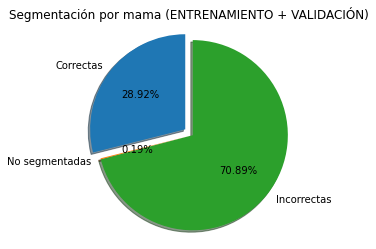

In [232]:
# Ahora mostramos una gráfica de "pastel" de esto información
labels = 'Correctas', 'No segmentadas', 'Incorrectas'
sizes = [total_corrects, total_no_segmnt, total_incorrects]
explode = (0.1, 0, 0)  # Para resaltar la sección de segementaciones correctas en el gráfico

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%0.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Esta declaración asegura que se dibuje un círculo

ax1.title.set_text('Segmentación por mama (ENTRENAMIENTO + VALIDACIÓN)')

plt.show()

In [234]:
exitos3_percentage = (exitos+exitos2)/(out_train.shape[0]/2+out_test.shape[0]/2+8)*100
mal3_percentage = ((out_train.shape[0]/2-exitos)+(out_test.shape[0]/2-exitos2))/(out_train.shape[0]/2+out_test.shape[0]/2+8)*100
no3_segmnt_percentage = 8/(out_train.shape[0]/2+out_test.shape[0]/2+8)*100

In [237]:
print('Total de pares de mamas segementadas correctamente en el conjunto TOTAL: '+str(exitos+exitos2))
print('Porcentaje de pares de mamas segmentadas correctamente en el cojunto TOTAL: %0.2f%%'%exitos3_percentage)

Total de pares de mamas segementadas correctamente en el conjunto TOTAL: 884
Porcentaje de pares de mamas segmentadas correctamente en el cojunto TOTAL: 21.20%


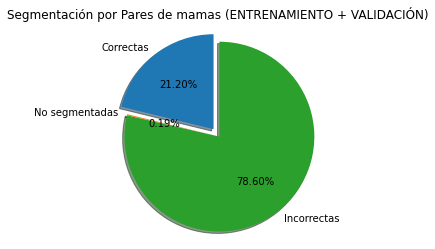

In [238]:
# Ahora mostramos una gráfica de "pastel" de esto información
labels = 'Correctas', 'No segmentadas', 'Incorrectas'
sizes = [exitos3_percentage, no3_segmnt_percentage, mal3_percentage]
explode = (0.1, 0, 0)  # Para resaltar la sección de segmentaciones correctas en el gráfico

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%0.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Esta declaración asegura que se dibuje un círculo

ax1.title.set_text('Segmentación por Pares de mamas (ENTRENAMIENTO + VALIDACIÓN)')

plt.show()

# Conclusiones

Con base en los resultados descritos en esta libreta se desechará la utilización de una segmentación automática basada en la morfología. La razón no sólo se justifica por los resultados que muestran que más del 50% de los datos no se procesarían, sino también por la evidencia (citada en el escrito final de TRABAJO TERMINAL II) que obtener información no sólo de la mama sino de su ambiente (el surco inferior, el cuellos, etc) influye también en la detección. Un ejemplo que apoya esta aseveración es que la actividad fisiológica de los ganglios del sistema linfáfico (que pasan por el cuello y las axilas) presentan una mayor actividad (por tanto generan más calor) cuando existe un proceso tumoral en la mama.

Por tanto se propone una nueva segementación en dos regiones del cuerpo de acuerdo a un plano sagital (que divide al cuerpo en derecho e izquierdo). 